# An initial look at data from a single generator combined with wind records

TThis section is an initial look at examining the generation data for the 5kW wind turbine at Quarry House, Orkney, retrieved from the 'Sunnyportal' website with the weather observations from the Met Office for Kirkwall Airport Orkney, logged by the datalogger device

By looking at a limited amount of data simplifies plots, allowing easy visualisation, with a view to identifying issues and establishing methods for use later.

 The weather data examined was from the start of the datalogging exercise, 2/2/2019, to 13/4/2019, consisting of 1533 records.  A corresponding range of production data for the ‘Quarry House’ turbine was retrieved from the website.

Simple plots are produced, issues with the data records are identified and managed.  The datasets are successfully combined and expected correlations between power production and windspeed can be clearly seen. Further insights into other factors affecting the system(wind direction) are visualised by adding a colour layer.

## Simple plots

Plots relative to time were easily plotted. Overlaying electricity production onto the wind speed shows a clear correlation. 

In [1]:
# load required libraries
# library(sqldf) # sql functions on dataframes
library(scales) # used here forn blending coloours on charts
library(plyr) # used here to sort and count factor columns

In [2]:
#  set default output size for plots to 8 inches by 4 inches.
options(repr.plot.width=12, repr.plot.height=6)

In [4]:
# read in the data scraped from 'sunny portal' website.
quarryhouse <- read.csv("./database/quarryhouse.csv", header=TRUE, sep=",", dec=".")

In [5]:
# create a column of native R datetime type 
quarryhouse$dt <- as.POSIXct(quarryhouse$timestamp,format="%Y-%m-%d %H:%M",tz="GMT")

In [5]:
summary(quarryhouse)

            timestamp         mean            yield      
 2019-01-13 02:00:   1   Min.   :0.0000   Min.   :0.000  
 2019-01-13 03:00:   1   1st Qu.:0.2835   1st Qu.:0.253  
 2019-01-13 04:00:   1   Median :1.6230   Median :1.594  
 2019-01-13 05:00:   1   Mean   :1.9855   Mean   :1.980  
 2019-01-13 06:00:   1   3rd Qu.:3.7905   3rd Qu.:3.822  
 2019-01-13 07:00:   1   Max.   :4.9060   Max.   :4.921  
 (Other)         :2109                                   
       dt                     
 Min.   :2019-01-13 02:00:00  
 1st Qu.:2019-02-04 13:30:00  
 Median :2019-02-27 01:00:00  
 Mean   :2019-02-27 01:00:00  
 3rd Qu.:2019-03-21 12:30:00  
 Max.   :2019-04-13 00:00:00  
                              

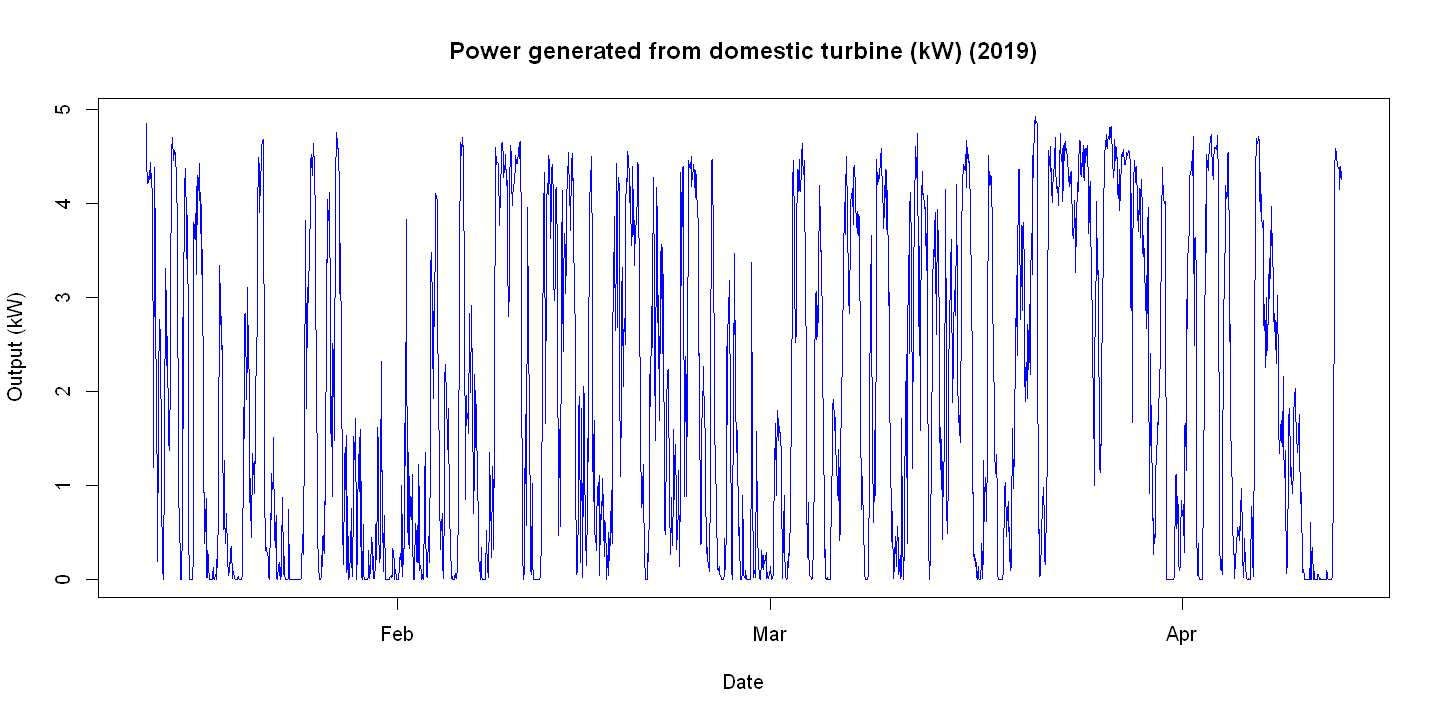

In [6]:
plot(quarryhouse$dt, quarryhouse$yield, 
     main="Power generated from domestic turbine (kW) (2019)", 
     xlab = "Date",
     ylab = "Output (kW)",
     type="l",col = "blue")

This plot is as would be expected, showing varying production over time.  The maximum rating of the turbine (5kW) is clearly seen, as are various periods of low and large production.

A histogram of the electricity production, shows that the turbine is often stopped but also that it is frequently near maximum yield. 

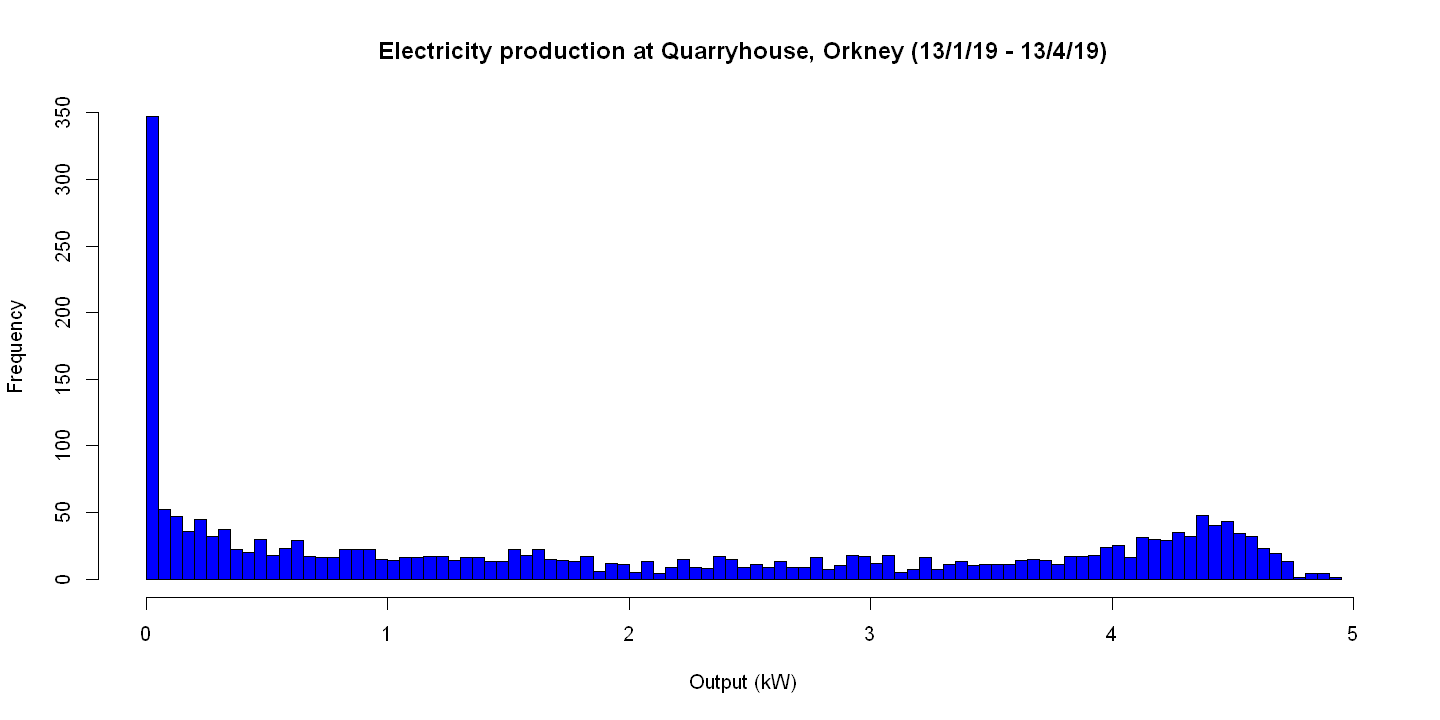

In [7]:
hist(quarryhouse$yield, 100,
     main = "Electricity production at Quarryhouse, Orkney (13/1/19 - 13/4/19)",
     xlab = "Output (kW)",
     ylab = "Frequency",
     col="blue"
    )

Example plots of weather records are also produced:

               timestamp     temperature        humidity         dewpoint     
 2019-02-08 09:00:00:   2   Min.   :-1.400   Min.   : 44.60   Min.   :-4.600  
 2019-02-08 10:00:00:   2   1st Qu.: 5.000   1st Qu.: 78.10   1st Qu.: 2.100  
 2019-02-08 11:00:00:   2   Median : 6.400   Median : 86.70   Median : 4.000  
 2019-02-08 12:00:00:   2   Mean   : 6.385   Mean   : 84.42   Mean   : 3.879  
 2019-02-08 13:00:00:   2   3rd Qu.: 7.900   3rd Qu.: 92.00   3rd Qu.: 5.900  
 2019-02-08 14:00:00:   2   Max.   :12.400   Max.   :100.00   Max.   : 9.700  
 (Other)            :1549                                                     
    wind_dir     wind_speed       pressure    Pt        visibility   
 S      :296   Min.   : 0.00   Min.   : 961   F:746   Min.   :  400  
 W      :239   1st Qu.:10.00   1st Qu.: 997   R:791   1st Qu.:13000  
 WSW    :172   Median :16.00   Median :1012   S: 24   Median :20000  
 SSW    :131   Mean   :16.36   Mean   :1008           Mean   :22651  
 SSE    :113   3rd

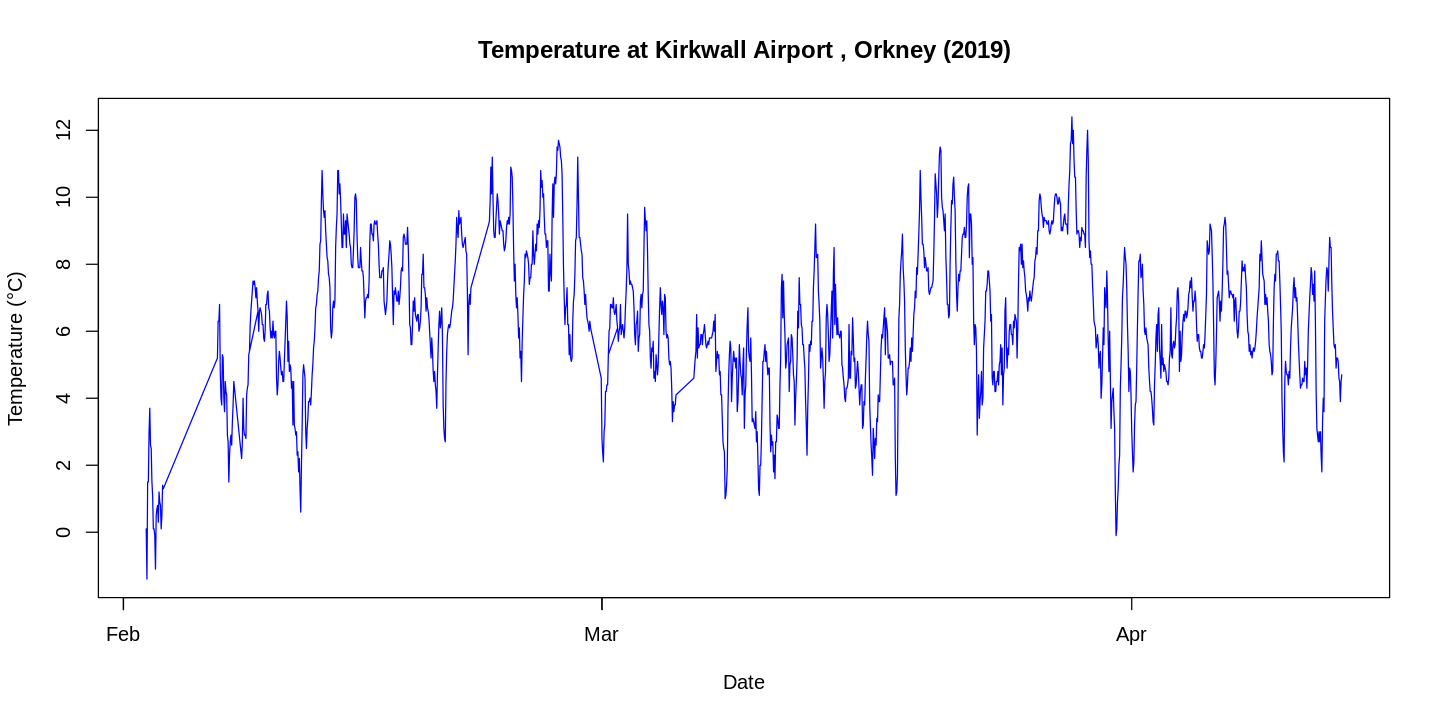

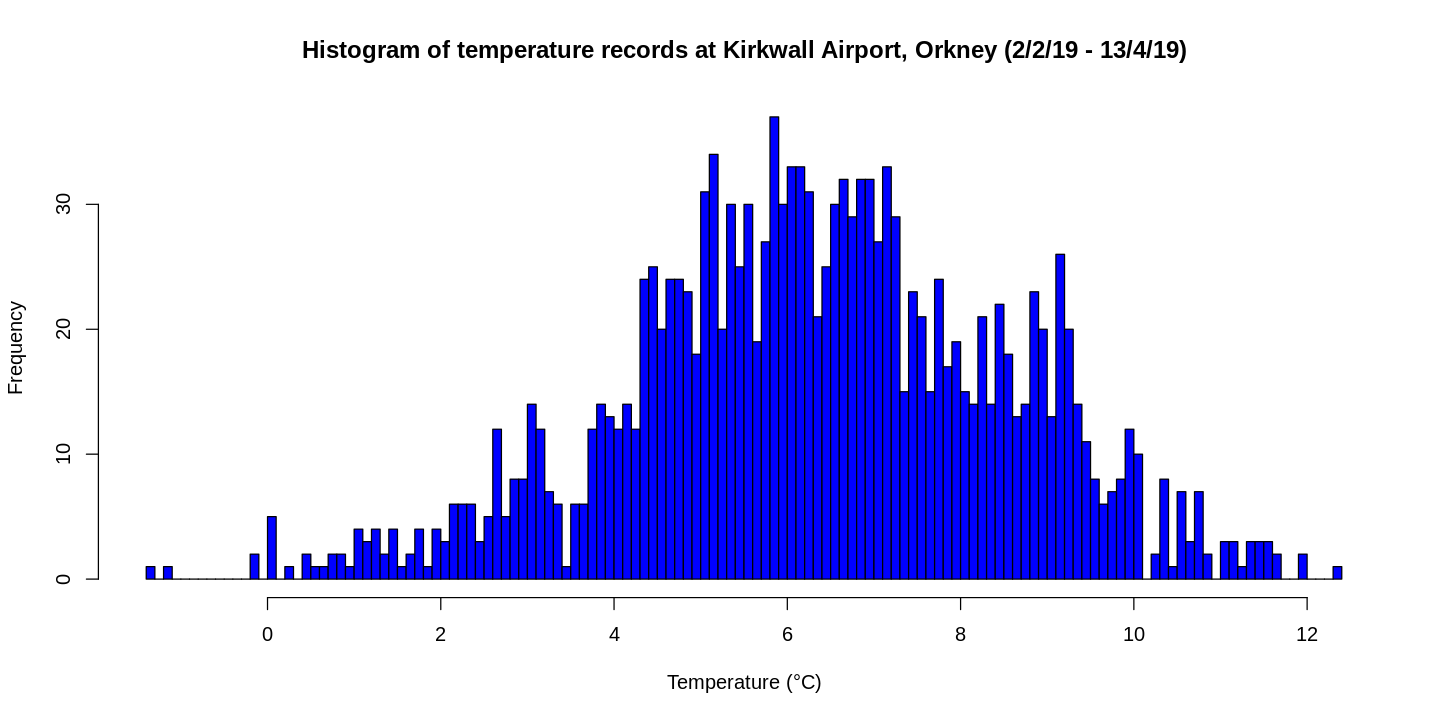

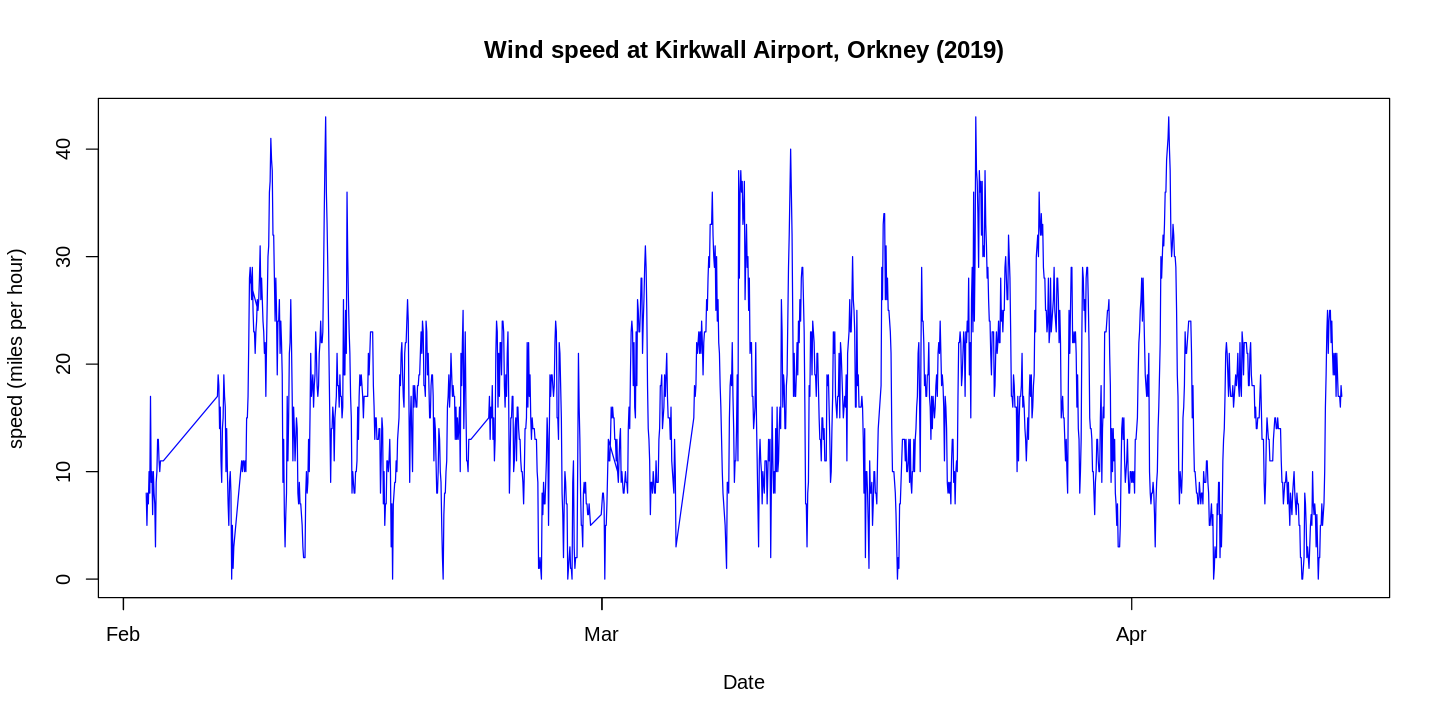

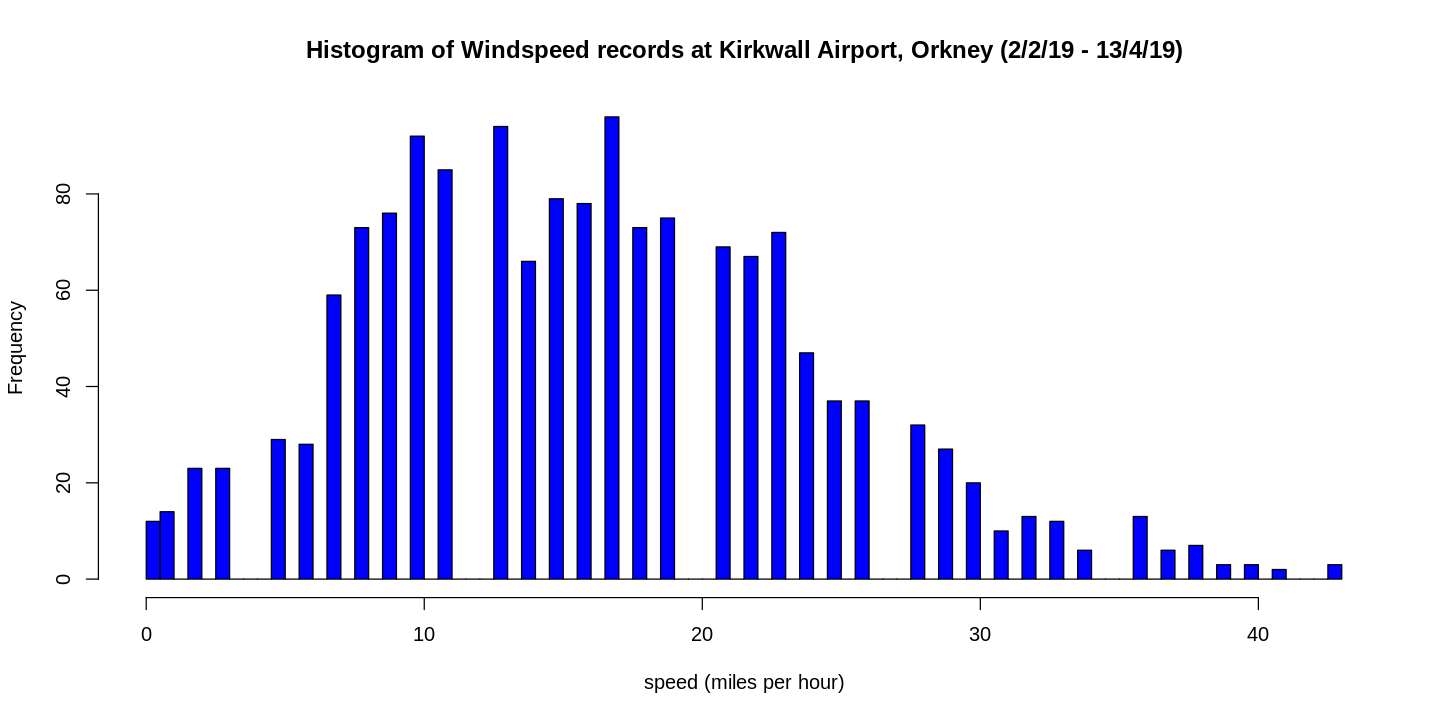

In [6]:
weather <- read.csv("./database/orkneyweatherlog.csv", header = TRUE, sep=",", dec =".")
weather$dt <- as.POSIXct(weather$timestamp,format="%Y-%m-%d %H:%M:%S",tz="GMT")
summary(weather)
plot(weather$dt, weather$temperature, 
     main="Temperature at Kirkwall Airport , Orkney (2019)", 
     ylab = "Temperature (°C)",
     xlab = "Date",
     type = "l", col ="blue")
hist(weather$temperature, 120,
     main="Histogram of temperature records at Kirkwall Airport, Orkney (2/2/19 - 13/4/19)", 
     xlab = "Temperature (°C)",
     ylab = "Frequency",
     col = "blue")
plot(weather$dt, weather$wind_speed,
     main="Wind speed at Kirkwall Airport, Orkney (2019)",
     ylab = "speed (miles per hour)",
     xlab = "Date",
     type = "l", col ="blue")
hist(weather$wind_speed, 100,
     main="Histogram of Windspeed records at Kirkwall Airport, Orkney (2/2/19 - 13/4/19)", 
     xlab = "speed (miles per hour)",
     ylab = "Frequency",
     col = "blue")

Again, the charts are generally as would be expected.  

In the time based plots, there are obvious gaps in the logged data, which appear as straight diagonal lines.  This was due to teething problems with the data logger, resulting in missed records.

The histogram of temperature appears to be a normal distribution curve, but with much 'noise' - i.e. the number of recorded values vary by a significant random amount from the ideal distribution.  This is to be expected given the relatively few number of records(~1500) with a large number of levels. (the range spans from -1.4 to 12.4°C, with one decimal place precision. ~120 levels).

In [30]:
# list each different value found in the temperature column
sort(unique(weather$temperature))

[1] -1.4 -1.1 -0.1  0.1  0.3  0.5  0.6  0.7  0.8  0.9  1.0  1.1  1.2  1.3  1.4
 [16]  1.5  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
 [31]  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.0  4.1  4.2  4.3  4.4
 [46]  4.5  4.6  4.7  4.8  4.9  5.0  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
 [61]  6.0  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.0  7.1  7.2  7.3  7.4
 [76]  7.5  7.6  7.7  7.8  7.9  8.0  8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
 [91]  9.0  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.0 10.1 10.3 10.4 10.5
[106] 10.6 10.7 10.8 10.9 11.1 11.2 11.3 11.4 11.5 11.6 11.7 12.0 12.4

The histogram of windspeed shows a typical skewed distrbution curve, again as would be expected. However, there are noticable gaps at 4, 12, 27, 35 and 42 miles per hour.  It is thought that this is probably because of rounding error introduced when converting the values to other units of measurement. 

Examining the values in this column of data confirms this, showing the gaps as described, and with each value being rounded to a whole integer.

In [9]:
# list each different value found in the wind_speed column
sort(unique(weather$wind_speed))

[1]  0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19 21 22 23 24 25 26 28
[26] 29 30 31 32 33 34 36 37 38 39 40 41 43

The datalogger request to the 'Met Office' webservice specifies the windspeed records to be returned in miles per hour (mph). The VakerVader retrieved data,  is returned in metres per second (ms<sup>-1</sup>). 

Looking closely at the VakerVader retrieved data, it also appears to be truncated with a rounding error.  

It is speculated that the windspeed is recorded in 'knots' and is converted to the user preferred units on demand.

In [10]:
# read the data file generated from the retrieved weather records from vakervader.se
data <- read.csv("../retrieval/database/vackerWeather.csv", header=TRUE, sep=",", dec=".")

#display number of records for each unique value
table(data$WindSpeed)


   0  0.5    1  1.5  2.1  2.6  3.1  3.6  4.1  4.6  5.1  5.7  6.2  6.7  7.2  7.7 
 152  143  263  430  535  619  715  841  864  831  785  752  665  712  674  664 
 8.2  8.7  9.3  9.8 10.3 10.8 11.3 11.8 12.3 12.9 13.4 13.9 14.4 14.9 15.4 15.9 
 557  496  436  380  319  270  187  157  133   91   76   71   53   50   32   26 
16.5   17 17.5   18 18.5   19 19.5 20.1 20.6 21.1 21.6 22.1 22.6 
  26   21   12   10   10   10    2    2    2    3    1    1    2 

An attempt was made to find the original unit values, but no exact correlation could be found.

Below is a table of knots converted to metres per second, rounded to one decimal place.  It does not exactly match the pattern above in the Vakervader data, but it does illustrate the how rounding can lead to the gaps in the series seen in the histogram of windspeed.

In [11]:
# exploring unit conversion for speed values
kts <-seq(0, by=1, length=10)
kts
mps<-kts*.53
mps
mps_rounded<-round(mps, 1)
mps_rounded

[1] 0 1 2 3 4 5 6 7 8 9

[1] 0.00 0.53 1.06 1.59 2.12 2.65 3.18 3.71 4.24 4.77

[1] 0.0 0.5 1.1 1.6 2.1 2.7 3.2 3.7 4.2 4.8

## Combining the production and weather records

Overlaying the two time dependant charts, shows a clear correlation between the windspeed and electricity production.

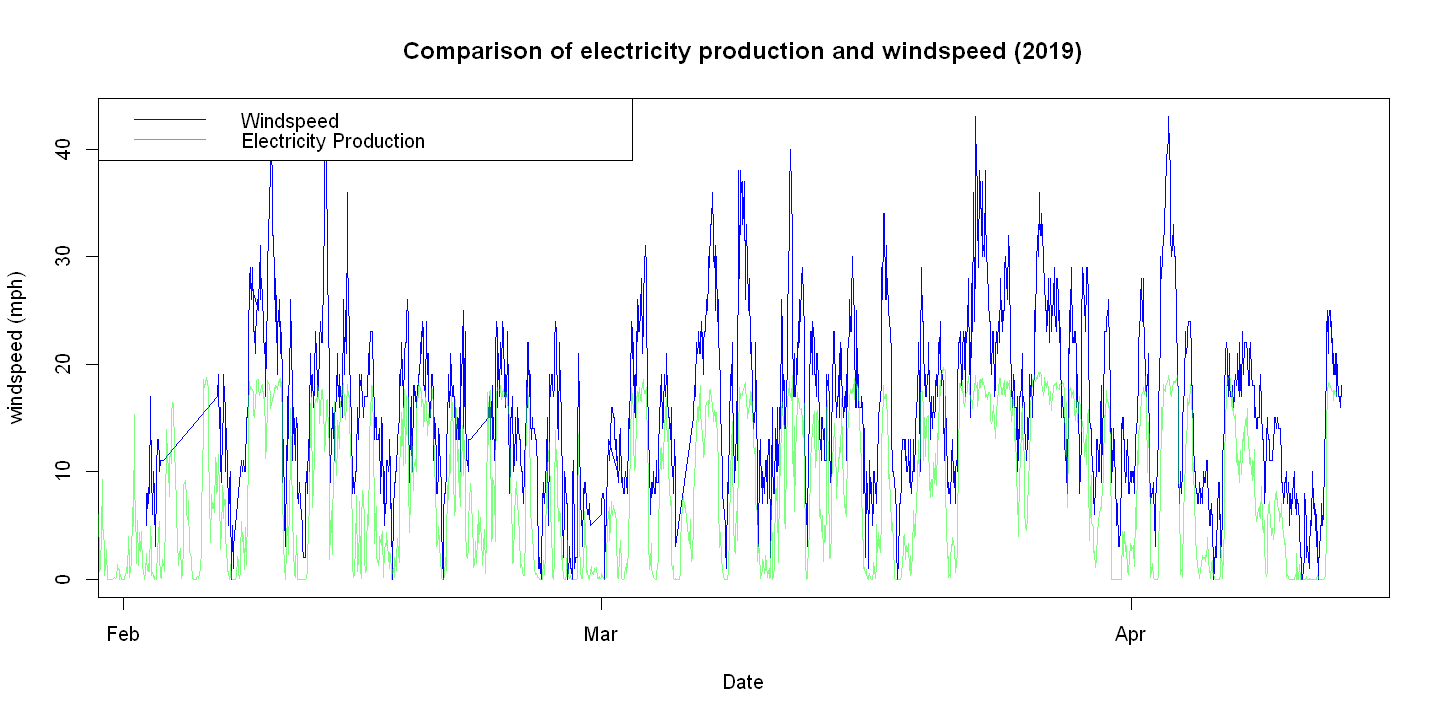

In [12]:
plot(weather$dt, weather$wind_speed,
     main="Comparison of electricity production and windspeed (2019)",
     type= "l",,
     xlab = "Date",
     ylab = "windspeed (mph)",
     col = alpha(c("blue", 0.5)), pch=46)
lines(quarryhouse$dt, quarryhouse$yield*4,
     col=alpha(c("green"), 0.5), pch=46)
legend("topleft", 
       legend=c("Windspeed", "Electricity Production"),
       col=c("blue", "green"), lty=1)

Combining the tables allows further correlations in the datasets to be explored. 

  In both cases, the timestamp of all records are recorded as being exactly on the hour, every hour. Thus the records are combined by simjply matching the timestamp on the record from each table.  

In [7]:
qcombined <- merge(quarryhouse, weather, by.x = "dt", by.y="dt")

A simple plot of the turbine's power output against windspeed shows the simple relationship. The turbine only starts to generate when the wind is above 5 miles per hour, reaching its maximum output above 20 mph.  There is some significant spread in the mid ranges of generation.  

This spread coud be due to differences in  weather conditions between the turbine and the weather station, as the turbine is located on the side of a hill, around ten miles from the weather station at Kirkwall Airport.  

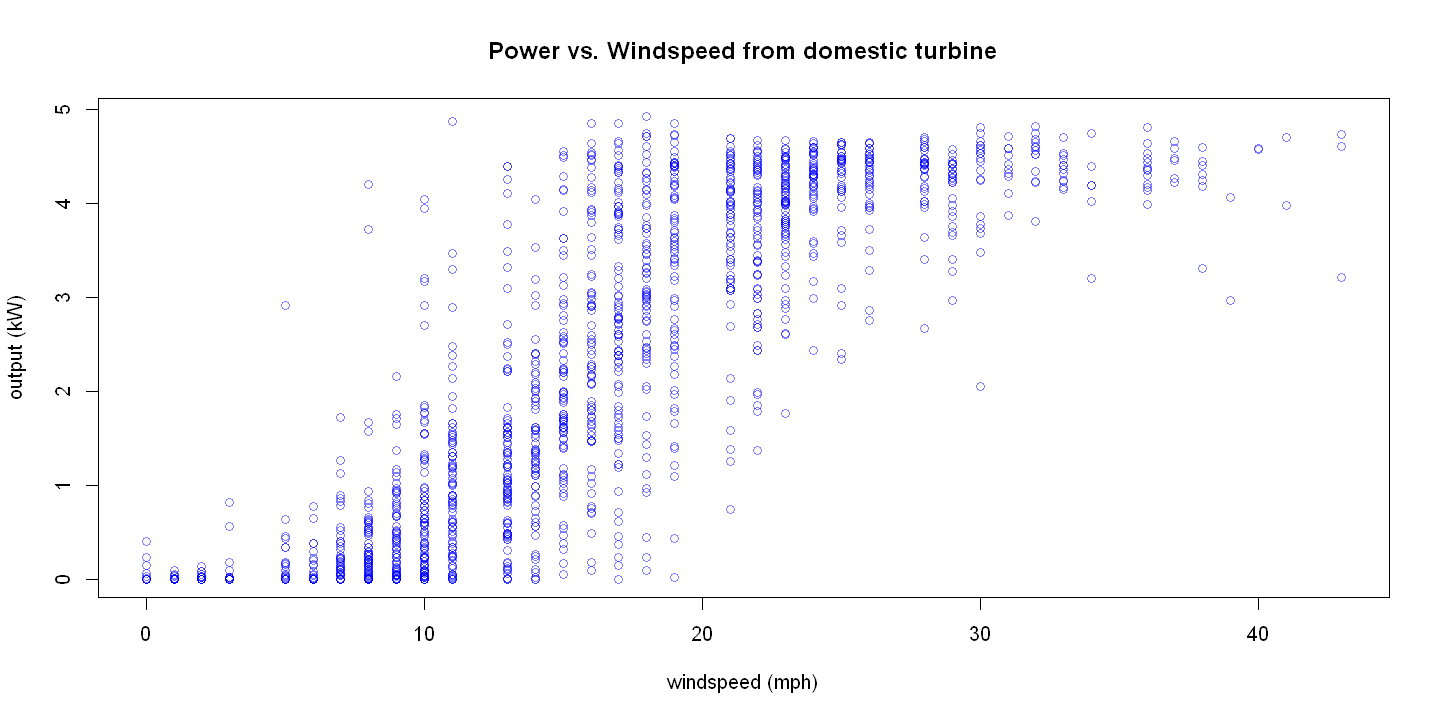

In [14]:
plot(qcombined$wind_speed, qcombined$yield,
     main="Power vs. Windspeed from domestic turbine",
     xlab = "windspeed (mph)",
     ylab = "output (kW)",
     col=alpha(c("blue"), 0.5), pch=1)


## Effect of Wind Direction

Charts were drawn to visualise the direction of the wind and its possible relationship to other factors.

In [8]:
# show table of count of records for each wind direction
summary(qcombined$wind_dir)

E ENE ESE   N  NE NNE NNW  NW   S  SE SSE SSW  SW   W WNW WSW 
 60 103  25  47  50  27  34  42 286  44 108 128 106 236  61 167

To plot a histogram of wind direction the values in the dataset need to be enumerated (or 'factored'), into the correct order. They are coloured as a spectrum to aid the visualisation.

In [9]:
qcombined$wind_dir <- factor(qcombined$wind_dir, c("N", "NNE", "NE", "ENE","E","ESE","SE","SSE","S",
                                                   "SSW","SW","WSW","W","WNW","NW","NNW"))

In [17]:
table(qcombined$wind_dir)


  N NNE  NE ENE   E ESE  SE SSE   S SSW  SW WSW   W WNW  NW NNW 
 47  27  50 103  60  25  44 108 286 128 106 167 236  61  42  34 

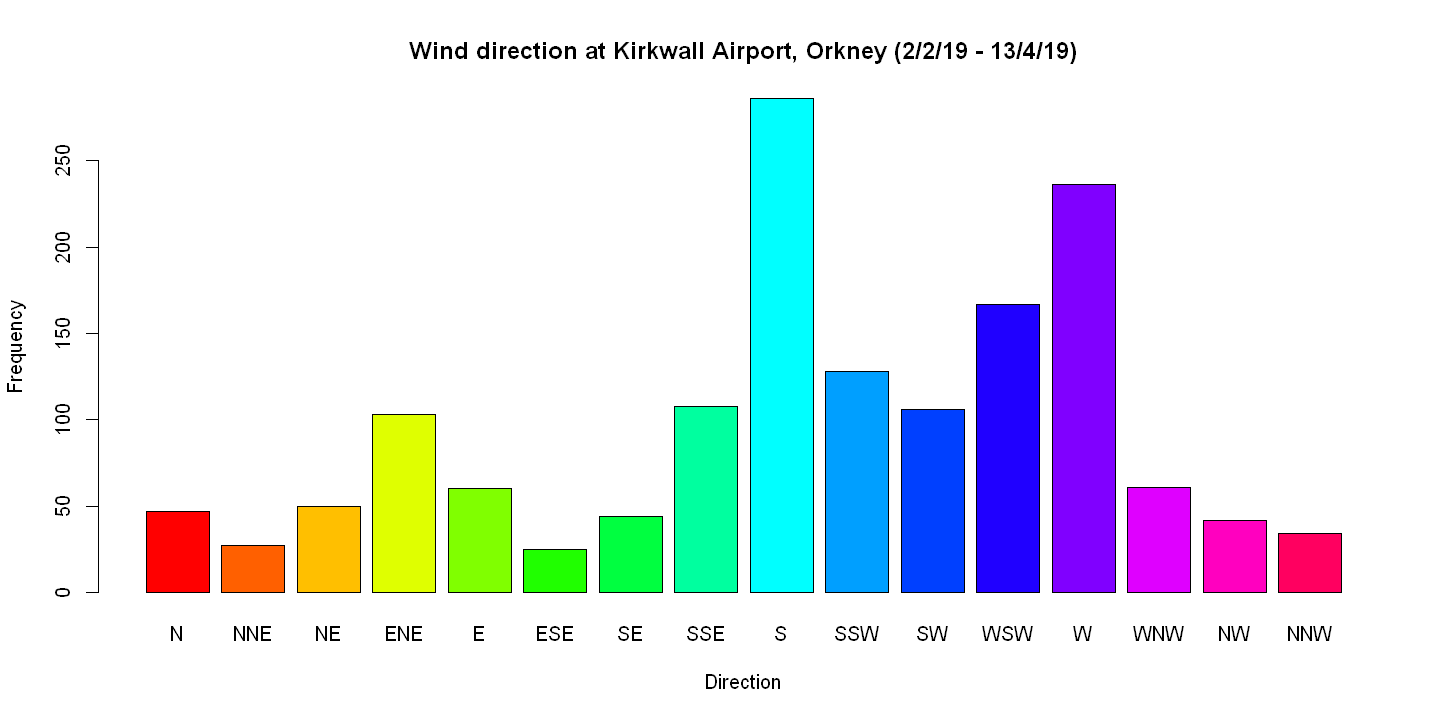

In [18]:
barplot(table(qcombined$wind_dir),
        main = "Wind direction at Kirkwall Airport, Orkney (2/2/19 - 13/4/19)",
        xlab = "Direction",
        ylab = "Frequency", 
        col=rainbow(16)
        #col="blue"
       )

This plot shows that for the period of this dataset (between 2/2/19 and 13/4/19) the prevailing winds are from the south and westerly directions.

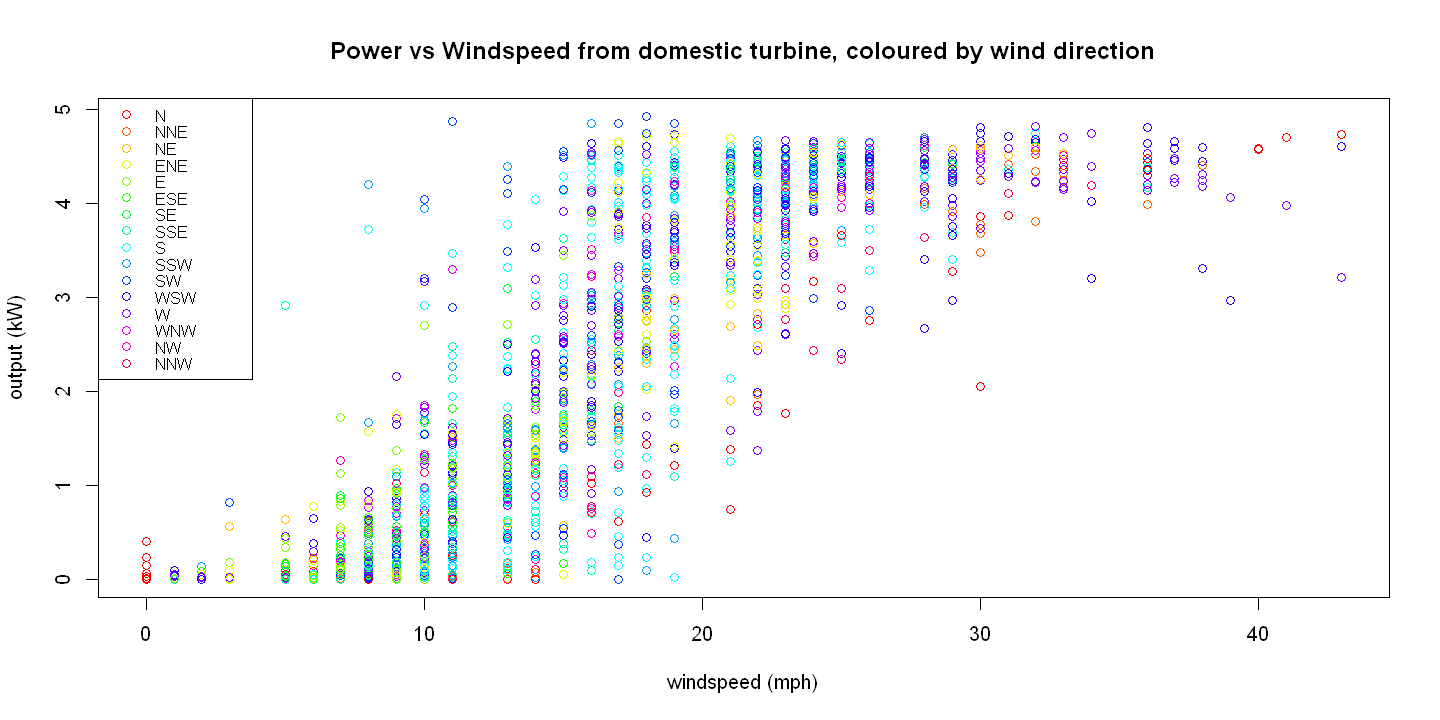

In [19]:
directions <- c("N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW")
colours <- rainbow(16)
dircolour <- setNames(as.list(colours), directions)
plot(qcombined$wind_speed, qcombined$yield,
     main="Power vs Windspeed from domestic turbine, coloured by wind direction",
     xlab = "windspeed (mph)",
     ylab = "output (kW)",
     col=as.character(dircolour[qcombined$wind_dir]), pch=1)
legend("topleft", pch=1, col=rainbow(16), legend=directions, pt.cex=1.0, cex=0.8)

In [15]:
# show table of count of records for each wind direction when windspeed is zero
table(qcombined$wind_dir[qcombined$wind_speed==0])


  N NNE  NE ENE   E ESE  SE SSE   S SSW  SW WSW   W WNW  NW NNW 
 12   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [26]:
qcombined$yield[qcombined$wind_speed==0]

[1] 0.032 0.228 0.000 0.000 0.398 0.000 0.008 0.000 0.144 0.000 0.000 0.055

By colouring the power versus windspeed chart for wind direction shows some interesting features.

When the windspeed is zero there are a number of records when the windturbine is generating electricity. It also appears that this only occurs when the wind is form the north. Looking at the weather observation records, it can be seen that all windspeed readings of zero have a northerly direction (0 degrees). This must be the conventional procedure in these cases.  Importantly, these records highlight the local differences in weather conditions between the weather station and the wind turbine, even though they are within 10 miles of each other.  i.e. one record with the wind speed recorded as zero at kikwall airport, shows the turbine is generating 0.2kW, suggesting that the turbine is experiencing a windspeed of between 5 and 10 miles per hour.  This will account for a significant anmount of scatter in the plot and exemplifies the difficulties in correlating the data.

Additionally, there is a tendancy for the red points to be on the lower fringes of the scatter.    This indicates that when the wind is from the north the turbine generally produces less power than would be expected for that particular wind speed.  

Similarly, there is a tendancy for the cyan/green (Southerly) points to be on the upper part, particularly in the range 15-25mph where maximum power output is produced at relatively lower windspeeds. However, there is significant variation for these in the 15-20mph range with some very low values present.

The Westerly winds (purple) seem to produce the most consistent above average yield.

It may be possible to explain this by looking at a relief map of the locale, as the topography of the surrounding landscape probably affects the windspeed in the area the wind turbine is located.  

The weather station at Kirkwall Airport is in a relatively flat, low lying area, exposed from all directions.

The wind turbine is located in a low lying gap in a string of hills that run from the north to the south west.  It can be seen that it will be sheltered by the string of hills to the north. When the wind is from this direction it will likely experience a lower windspeed than the airport.  It is completly open to the west - which is the direction that seems to produce the most consistent yield for any given windspeed.
The turbine is also exposed to the south where it is possible that the wind is funnelled between the hill, accelerating its speed, producing the higher than expected yield.  Bearing in mind that the conditions at the two sites may differ measurably, it may be that this 'funnelling' only occurs from a very specific direction, or other condition, that may not experienced at the weather station site.

<img src="../images/ReliefMap.PNG" alt="Relief map of Orkney Mainland" />

*(image from https://maps-for-free.com/)*


